# Fourier Lens

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import PhaseTypeHologram
from DiffractionTool import PatternGenerator
from DiffractionTool import HelperFunctions as hp

## Problems

As shown in the figure above, a 632.8nm laser beam is incident on a 200 micron diameter phase type hologram.
And the transmitted light forms an image of $500\mu m*500\mu m$ at $z=400\mu m$ (the image content is customized).
Combined with angular spectrum method or Rayleigh-Sommerfeld diffraction, the GS algorithm shall be built to optimize the following two cases of hologram phase distributions. Upload code and report which includes the deserved phase distribution and detailed analysis.
1. Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$
2. Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$
3. Compare the differences between the two cases and analyze the reasons

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/6738af360a3f9c9bf34ffd43a9751a1bcbfd55ff/notebooks/imgs/Prob5.png" width="50%">

<img src="imgs/Prob5.png" width="50%">

#### Paramters

In [5]:
N_size=3335
#μm plane [1000,1000]μm 
interval=0.3
waveLambda=0.6328
z=400
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2
hologramRadius=250

#### Original Image

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='Prob3Data.png'

In [7]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
imgActualSize=500
imgNSize=grayImg.shape[0]
grayImg=np.where(grayImg>100,1,0)
grayImg=grayImg/np.max(np.abs(grayImg))

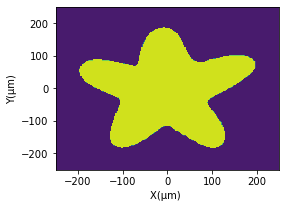

In [8]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

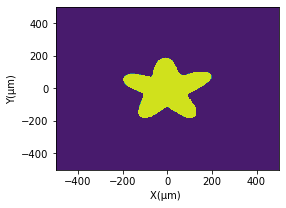

In [9]:
padSize=int((actualSize/(imgActualSize)*imgNSize-imgNSize)/2)
targetImg=cv2.copyMakeBorder(grayImg,padSize,padSize,padSize,padSize,cv2.BORDER_CONSTANT,value=0)
targetImg=cv2.resize(targetImg,(N_size,N_size))
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

In [10]:
'''
PTest=PatternGenerator(N_size,xyInterval,pattern='rect')
targetImg=hp.intensity(PTest.generate([200,200]))
''';

In [11]:
'''
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)
''';

In [12]:
print(targetImg.shape)

(3335, 3335)


### Hologram Pattern

In [13]:
shape=PatternGenerator(N_size,xyInterval,pattern='circle')

In [14]:
hologramShape=shape.generate([hologramRadius])

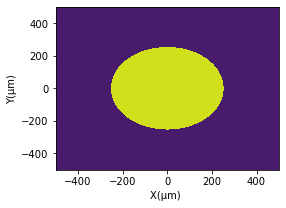

In [15]:
hp.displace_2d(hp.intensity(hologramShape),labels,range);

### Sub problem 1

Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$.

In [16]:
#parameters
pixelSize=[0.3]*2

In [17]:
hologramP1=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [18]:
loss=hologramP1.get_hologram(z,k,hologramShape,targetImg,epoches=100,epochStep=10)

Epoch [10/100], loss: 0.057422, time: 346.390536s
Epoch [20/100], loss: 0.059132, time: 226.040036s
Epoch [30/100], loss: 0.059563, time: 224.443461s
Epoch [40/100], loss: 0.058190, time: 224.365604s
Epoch [50/100], loss: 0.061145, time: 224.529794s
Epoch [60/100], loss: 0.057616, time: 225.323910s
Epoch [70/100], loss: 0.059415, time: 230.266515s
Epoch [80/100], loss: 0.058598, time: 230.668467s
Epoch [90/100], loss: 0.059588, time: 231.134052s
Epoch [100/100], loss: 0.057269, time: 230.725594s


Results

In [19]:
result=hologramP1.apply_hologram(z,k,hologramShape)

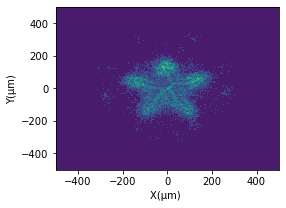

In [20]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

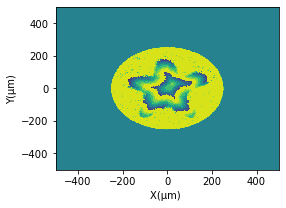

In [21]:
hp.displace_2d(hologramP1.get_hologram_phase_distribution(),labels,range)

### Sub problem 2

Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$

In [22]:
#parameters
pixelSize=[2.0]*2

In [23]:
hologramP2=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [24]:
loss=hologramP2.get_hologram(z,k,hologramShape,targetImg,epoches=100,epochStep=10)

Epoch [10/100], loss: 0.060196, time: 345.409198s
Epoch [20/100], loss: 0.061953, time: 226.020749s
Epoch [30/100], loss: 0.059841, time: 231.646427s
Epoch [40/100], loss: 0.061303, time: 231.424949s
Epoch [50/100], loss: 0.061066, time: 228.586603s
Epoch [60/100], loss: 0.064465, time: 226.858424s
Epoch [70/100], loss: 0.062863, time: 231.974710s
Epoch [80/100], loss: 0.062939, time: 232.161379s
Epoch [90/100], loss: 0.063083, time: 228.258774s
Epoch [100/100], loss: 0.064084, time: 227.500182s


Results

In [25]:
result=hologramP2.apply_hologram(z,k,hologramShape)

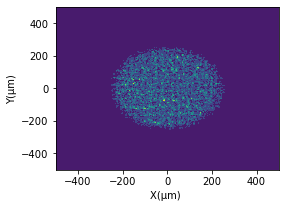

In [26]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

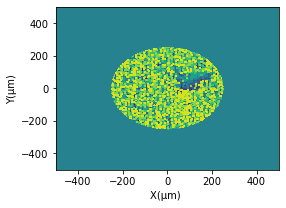

In [27]:
hp.displace_2d(hologramP2.get_hologram_phase_distribution(),labels,range)

### Sub problem 3

Compare the differences between the two cases and analyze the reasons

Answer: When the pixel size is too large, the result image is very rough. The reason is that the GS algorithm is not able to capture the phase distribution of the hologram and does not converge due to the roughness of pixel. So it might be better to use a small pixel size.